In [1]:
import pandas as pd
import numpy as np

import env
import os

# Clustering - Data Wrangling Exercises

## Zillow 
### Acquire and Summarize
##### Exercise 1. Acquire data from the cloud database.

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.

In [2]:
def get_zillow():
    '''
    This function acquires the requisite zillow data from the Codeup SQL database and caches it locally it for future use in a csv 
    document; once the data is accessed the function then returns it as a dataframe.
    '''

    filename = "zillow.csv"

    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        query = '''
            SELECT 
                p.parcelid,
                airconditioningtypeid,
                architecturalstyletypeid,
                basementsqft,
                bathroomcnt,
                bedroomcnt,
                buildingclasstypeid,
                buildingqualitytypeid,
                calculatedbathnbr,
                decktypeid,
                finishedfloor1squarefeet,
                calculatedfinishedsquarefeet,
                finishedsquarefeet12,
                finishedsquarefeet13,
                finishedsquarefeet15,
                finishedsquarefeet50,
                finishedsquarefeet6,
                fips,
                fireplacecnt,
                fullbathcnt,
                garagecarcnt,
                garagetotalsqft,
                hashottuborspa,
                heatingorsystemtypeid,
                latitude,
                longitude,
                lotsizesquarefeet,
                poolcnt,
                poolsizesum,
                pooltypeid10,
                pooltypeid2,
                pooltypeid7,
                propertycountylandusecode,
                propertylandusetypeid,
                propertyzoningdesc,
                rawcensustractandblock,
                regionidcity,
                regionidcounty,
                regionidneighborhood,
                regionidzip,
                roomcnt,
                storytypeid,
                threequarterbathnbr,
                typeconstructiontypeid,
                unitcnt,
                yardbuildingsqft17,
                yardbuildingsqft26,
                yearbuilt,
                numberofstories,
                fireplaceflag,
                structuretaxvaluedollarcnt,
                taxvaluedollarcnt,
                assessmentyear,
                landtaxvaluedollarcnt,
                taxamount,
                taxdelinquencyflag,
                taxdelinquencyyear,
                censustractandblock,
                propertylandusedesc,
                logerror,
                p.transactiondate
            FROM
                (SELECT predictions_2017.parcelid, 
                        MAX(transactiondate) AS max_date
                FROM predictions_2017
                GROUP
                BY parcelid) AS m
            JOIN predictions_2017 as p
                ON p.parcelid = m.parcelid
                AND p.transactiondate = m.max_date
            JOIN
                properties_2017 ON properties_2017.parcelid = p.parcelid
            JOIN
                propertylandusetype USING (propertylandusetypeid)
            Where
                propertylandusedesc = 'Single Family Residential' AND 
                transactiondate LIKE '2017-%%'
            ;   
        '''
        url = env.get_db_url('zillow')
        df = pd.read_sql(query, url)
        df.to_csv(filename, index = False)

        return df 

In [3]:
df = get_zillow()

In [4]:
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusedesc,logerror,transactiondate
0,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,Single Family Residential,0.025595,2017-01-01
1,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,Single Family Residential,0.055619,2017-01-01
2,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,Single Family Residential,0.005383,2017-01-01
3,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,...,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,Single Family Residential,-0.103410,2017-01-01
4,12095076,1.0,NaN,NaN,3.0,4.0,NaN,9.0,3.0,NaN,...,773303.0,2016.0,496619.0,9516.26,NaN,NaN,6.037461e+13,Single Family Residential,-0.001011,2017-01-01


##### Exercise 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [5]:
df.shape

(52319, 61)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52319 entries, 0 to 52318
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52319 non-null  int64  
 1   airconditioningtypeid         13615 non-null  float64
 2   architecturalstyletypeid      70 non-null     float64
 3   basementsqft                  47 non-null     float64
 4   bathroomcnt                   52319 non-null  float64
 5   bedroomcnt                    52319 non-null  float64
 6   buildingclasstypeid           0 non-null      float64
 7   buildingqualitytypeid         33654 non-null  float64
 8   calculatedbathnbr             52184 non-null  float64
 9   decktypeid                    389 non-null    float64
 10  finishedfloor1squarefeet      4371 non-null   float64
 11  calculatedfinishedsquarefeet  52238 non-null  float64
 12  finishedsquarefeet12          52073 non-null  float64
 13  f

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,52319.0,1.299682e+07,3.350951e+06,1.071186e+07,1.151017e+07,1.257825e+07,1.413036e+07,1.676878e+08
airconditioningtypeid,13615.0,2.439589e+00,3.847925e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,70.0,7.100000e+00,2.665670e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,47.0,6.789787e+02,7.118252e+02,3.800000e+01,2.635000e+02,5.120000e+02,8.095000e+02,3.560000e+03
bathroomcnt,52319.0,2.300015e+00,1.022816e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
bedroomcnt,52319.0,3.300770e+00,9.475632e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.400000e+01
buildingclasstypeid,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildingqualitytypeid,33654.0,6.264961e+00,1.716328e+00,1.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
calculatedbathnbr,52184.0,2.305276e+00,1.018076e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
decktypeid,389.0,6.600000e+01,0.000000e+00,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01


##### Exercise 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [8]:
def obs_attr(df):
    num_rows_missing = []
    pct_rows_missing = []
    column_name = []
    for column in df.columns.tolist():
        num_rows_missing.append(df[column].isna().sum())
        pct_rows_missing.append(df[column].isna().sum() / len(df))
        column_name.append(column)
    new_info = {'column_name':column_name, 'num_rows_missing': num_rows_missing, 'pct_rows_missing': pct_rows_missing}
    return pd.DataFrame(new_info, index=None)

In [9]:
zillow_obs = obs_attr(df)
zillow_obs.set_index('column_name', inplace=True)
zillow_obs.head(60)

,num_rows_missing,pct_rows_missing
column_name,,
parcelid,0,0.000000
airconditioningtypeid,38704,0.739769
architecturalstyletypeid,52249,0.998662
basementsqft,52272,0.999102
bathroomcnt,0,0.000000
bedroomcnt,0,0.000000
buildingclasstypeid,52319,1.000000
buildingqualitytypeid,18665,0.356754
calculatedbathnbr,135,0.002580


Many of the columns essentially have no data in them. I need to get ride of the majority of them as they are just junk and decide how to deal with the nulls in the remaining columns after.

### Prepare
##### Exercise 1: Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...)

In [10]:
df.propertylandusedesc.value_counts()

Single Family Residential    52319
Name: propertylandusedesc, dtype: int64

As seen above, I took care of this in my SQL query and only pulled in Single Family Residential properties.

##### Exercise 2: Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

In [11]:
def drop_undesired(df, prop_required_column = .9, prop_required_row = .9):
    ''' This function takes in a dataframe and drops columns based on whether it meets the threshold for having values
    in rows and not null values. It then drops any rows based on whether it meets the threshold for having enough
    values in the row.
    
    Arguments: df - a dataframe
                prop_required_column - the proportion of a given column that must be filled by values and not nulls
                prop_required_row - the proportion of a given row that must be filled by values and not nulls
    Returns: a dataframe which no longer has the rows and columns dropped that didn't meet the threshhold.
    '''
    for column in df.columns.tolist():
        if 1-(df[column].isna().sum() / len(df)) < prop_required_column:
            df = df.drop(column, axis = 1)
            
    for row in range(len(df)):
        if 1-(df.loc[row].isna().sum() / len(df.loc[row])) < prop_required_row:
            df = df.drop(row, axis=0)
    return df

In [12]:
drop_undesired(df).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52176 entries, 0 to 52318
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52176 non-null  int64  
 1   bathroomcnt                   52176 non-null  float64
 2   bedroomcnt                    52176 non-null  float64
 3   calculatedbathnbr             52140 non-null  float64
 4   calculatedfinishedsquarefeet  52175 non-null  float64
 5   finishedsquarefeet12          52031 non-null  float64
 6   fips                          52176 non-null  float64
 7   fullbathcnt                   52140 non-null  float64
 8   latitude                      52176 non-null  float64
 9   longitude                     52176 non-null  float64
 10  lotsizesquarefeet             51844 non-null  float64
 11  propertycountylandusecode     52176 non-null  object 
 12  propertylandusetypeid         52176 non-null  float64
 13  r

## Mall Customers Exercises
##### Exercise 1: Acquire data from the customers table in the mall_customers database.

In [13]:
query = '''
SELECT * 
FROM customers;
'''
url = env.get_db_url('mall_customers')
df = pd.read_sql(query, url)

In [14]:
df = df.set_index('customer_id')
df.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


##### Exercise 2: Summarize the data (include distributions and descriptive statistics).

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [16]:
df.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='age', ylabel='Count'>

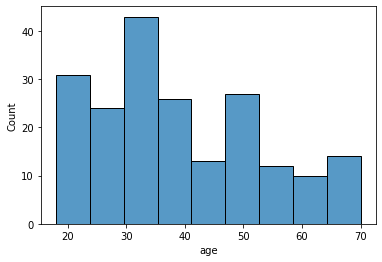

In [18]:
sns.histplot(df.age)

<AxesSubplot:xlabel='annual_income', ylabel='Count'>

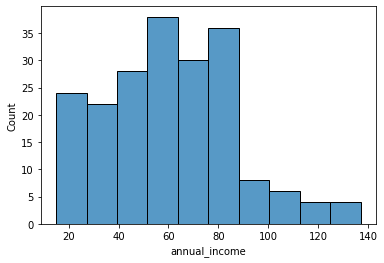

In [19]:
sns.histplot(df.annual_income)

<AxesSubplot:xlabel='spending_score', ylabel='Count'>

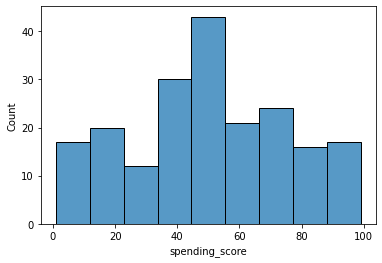

In [20]:
sns.histplot(df.spending_score)

##### Exercise 3: Detect outliers using IQR.

In [21]:
import scipy.stats as stats

In [22]:
q1, q3 = df.age.quantile([.25, .75])
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)

lower_bound = q1 - (1.5 * iqr)

upper_bound, lower_bound

(79.375, -1.625)

In [23]:
df.age.max()

70

No age outliers.

In [24]:
q1, q3 = df.annual_income.quantile([.25, .75])
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)

lower_bound = q1 - (1.5 * iqr)

upper_bound, lower_bound

(132.75, -13.25)

In [25]:
df['income_outlier'] = df.annual_income > upper_bound

In [26]:
df.head()

,gender,age,annual_income,spending_score,income_outlier
customer_id,,,,,
1,Male,19,15,39,False
2,Male,21,15,81,False
3,Female,20,16,6,False
4,Female,23,16,77,False
5,Female,31,17,40,False


In [27]:
q1, q3 = df.spending_score.quantile([.25, .75])
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)

lower_bound = q1 - (1.5 * iqr)

upper_bound, lower_bound

(130.375, -22.625)

In [28]:
df.spending_score.max()

99

No spending_score outliers.

##### Exercise 4: Split data into train, validate, and test.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train, test = train_test_split(df, test_size=.2)
train, validate = train_test_split(train, test_size = .3)

In [31]:
train.shape, validate.shape, test.shape

((112, 5), (48, 5), (40, 5))

##### Exercise 5: Encode categorical columns using a one hot encoder (pd.get_dummies).

In [32]:
dummy_df = pd.get_dummies(df, columns = ['gender'], drop_first=True, dummy_na=False)
dummy_df.head()

,age,annual_income,spending_score,income_outlier,gender_Male
customer_id,,,,,
1,19,15,39,False,1
2,21,15,81,False,1
3,20,16,6,False,0
4,23,16,77,False,0
5,31,17,40,False,0


##### Exercise 6: Handles missing values.

In [33]:
df.isna().value_counts()

gender  age    annual_income  spending_score  income_outlier
False   False  False          False           False             200
dtype: int64

There are NO missing values.

##### Exercise 7: Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
columns_to_scale = dummy_df.select_dtypes('number').columns.tolist()

In [36]:
columns_to_scale

['age', 'annual_income', 'spending_score', 'gender_Male']

In [37]:
scaler = MinMaxScaler()
scaled_df = dummy_df.copy()

In [38]:
scaled_df[columns_to_scale] = pd.DataFrame(scaler.fit_transform(dummy_df[columns_to_scale]),
                                          columns=columns_to_scale).set_index([dummy_df.index])

In [40]:
scaled_df

,age,annual_income,spending_score,income_outlier,gender_Male
customer_id,,,,,
1,0.019231,0.000000,0.387755,False,1.0
2,0.057692,0.000000,0.816327,False,1.0
3,0.038462,0.008197,0.051020,False,0.0
4,0.096154,0.008197,0.775510,False,0.0
5,0.250000,0.016393,0.397959,False,0.0
...,...,...,...,...,...
196,0.326923,0.860656,0.795918,False,0.0
197,0.519231,0.909836,0.275510,False,0.0
198,0.269231,0.909836,0.744898,False,1.0
